# Pandas data frames and visualisation: Exercise solutions

**Author**: Andrea Ballatore (Birkbeck, University of London)

**Abstract**: Learn how to use data frames with the **pandas** package (https://pandas.pydata.org) and how to do basic data visualisations with **matplotlib**.

## Setup
This is to check that your environment is set up correctly (it should print 'env ok', ignore warnings).

In [1]:
# Test geospatial libraries
# check environment
import os
print("Conda env:", os.environ['CONDA_DEFAULT_ENV'])
assert os.environ['CONDA_DEFAULT_ENV'] == 'geoprogv1'
# spatial libraries 
import fiona as fi
import pandas as pd
import pysal as sal
import matplotlib.pyplot as plt
print('env ok')

Conda env: geoprogv1
env ok


-----
## Exercises

When you are in doubt about how a package or a function work, use the Python website (https://docs.python.org/3.8/) and **Google** to find relevant documentation. **Reuse** the code from the content notebook.

a. Create a data frame about **4 African countries** of your choice, including the following attributes: country name; current population; GDP in USD; Human Development Index. Use Google to find the data and make sure it is from reputable sources.

In [5]:
# data as 2019
countries_df = pd.DataFrame({'name':['Ghana','South Africa','Egypt','Sudan'],
                             'pop_m':[30.42, 58.56, 100.4, 42.81],
                             'gdp_b_usd': [66.98, 351.4, 303.1, 30.51],
                             'hdi': [0.61,0.71,0.68,0.51]})
                           #index=["ghana",'safrica','egypt','sudan'])
# show data frame
countries_df

,name,pop_m,gdp_b_usd,hdi
0,Ghana,30.42,66.98,0.61
1,South Africa,58.56,351.40,0.71
2,Egypt,100.40,303.10,0.68
3,Sudan,42.81,30.51,0.51


b. Print columns and index of the data frame. Select the country with the highest GDP. Use `.sort_values(...)` and `.head(...)`.

In [10]:
print(countries_df.columns)
print(countries_df.index)

# note the two operations concatenated
countries_df.sort_values('gdp_b_usd', ascending=False).head(1)

Index(['name', 'pop_m', 'gdp_b_usd', 'hdi'], dtype='object')
RangeIndex(start=0, stop=4, step=1)


,name,pop_m,gdp_b_usd,hdi
1,South Africa,58.56,351.4,0.71
2,Egypt,100.40,303.1,0.68


c. Calculate GDP per capita based on the existing columns and store the result in a new column. Round the values to integer.

In [11]:
# note that the GDP is billions of USD, and the population is in millions.
# 1e9 = 1 000 000 000
countries_df['gdp_pc'] = round((countries_df['gdp_b_usd']*1e9) / (countries_df['pop_m']*1e6))

# the result is an approximation and is not far from the official values!
countries_df

,name,pop_m,gdp_b_usd,hdi,gdp_pc
0,Ghana,30.42,66.98,0.61,2202.0
1,South Africa,58.56,351.40,0.71,6001.0
2,Egypt,100.40,303.10,0.68,3019.0
3,Sudan,42.81,30.51,0.51,713.0


d. Save the data frame into a TSV file (`to_csv`) and to a pickle (`to_pickle`) file in folder `out`.

In [12]:
# you can open the result in Excel or similar programmes:
countries_df.to_csv('out/african_countries_df.tsv', index=False, sep='\t')

# this will be readable only in Python
countries_df.to_pickle('out/african_countries_df.pik')

e. Load file `out/world_bank_eu_2014.csv` into a data frame. Print the columns and the first 10 rows. If the file is not present, re-run the cell in the content notebook.

In [13]:
# insert code here
eu_df = pd.read_csv('out/world_bank_eu_2014.csv')
# always check how many rows you loaded
print("loaded rows:",len(eu_df))

print(eu_df.columns)

eu_df.head(10)

loaded rows: 28
Index(['iso2c', 'iso3c', 'country', 'date', 'pop', 'internet_users',
       'life_exp', 'in_tourists', 'research_gdp', 'gdp'],
      dtype='object')


,iso2c,iso3c,country,date,pop,internet_users,life_exp,in_tourists,research_gdp,gdp
0,AT,AUT,Austria,2014,8546356,80.995825,81.490244,25291000.0,3.08429,4.170597e+11
1,BE,BEL,Belgium,2014,11209057,85.000000,81.287805,7887000.0,2.38729,5.036194e+11
2,BG,BGR,Bulgaria,2014,7223938,55.490000,74.465854,7311000.0,0.79377,1.268198e+11
3,CY,CYP,Cyprus,2014,1152285,69.330000,80.178000,2441000.0,0.50835,2.561163e+10
4,CZ,CZE,Czech Republic,2014,10525347,74.231712,78.824390,8096000.0,1.97285,3.395826e+11
5,DE,DEU,Germany,2014,80982500,86.190000,81.090244,32999000.0,2.86691,3.807113e+12
6,DK,DNK,Denmark,2014,5643475,95.990000,80.700000,10267000.0,2.91409,2.703306e+11
7,ES,ESP,Spain,2014,46480882,76.190000,83.229268,64939000.0,1.23535,1.558306e+12
8,EE,EST,Estonia,2014,1314545,84.241528,77.034146,3160000.0,1.42931,3.830019e+10
9,FI,FIN,Finland,2014,5461512,86.530393,81.180488,2731000.0,3.16931,2.280586e+11


f. Print descriptive statistics for the columns `research_gdp` (% of GDP devoted to research & development). Show a histogram too. Select the countries that are not within the IQR (i.e. countries with high and low values).

count    28.000000
mean      1.600199
std       0.867260
min       0.382250
25%       0.868385
50%       1.348370
75%       2.298798
max       3.169310
Name: research_gdp, dtype: float64


Text(0, 0.5, 'Number of countries')

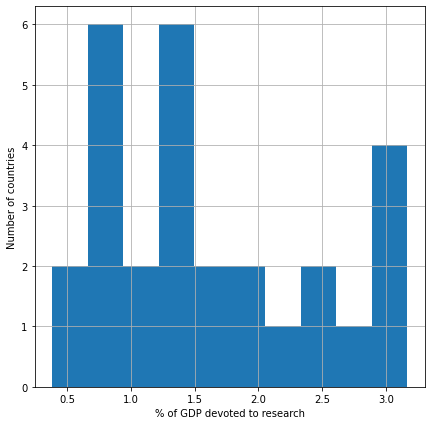

In [21]:
print(eu_df['research_gdp'].describe())

# plot histogram (width x height)
fig = plt.figure(figsize = (7,7))
# ax stands for axes and is the canvas for the viz
ax = fig.gca()
eu_df['research_gdp'].hist(ax=ax)
# set x and y axis labels
plt.xlabel("% of GDP devoted to research")
plt.ylabel("Number of countries")

In [23]:
# find countries with values of research_gdp outside of the IQR
# get the quartiles
q1 = eu_df['research_gdp'].quantile(.25)
q3 = eu_df['research_gdp'].quantile(.75)
print(q1,q3)

# this is done with a "mask", which says if the conditions are met for each row.
# note that within pandas expressions, we use symbols "| &" instead of "or and"
mask = (eu_df['research_gdp'] < q1) | (eu_df['research_gdp'] > q3)
# the mask contains some true rows and false rows
print(mask)

0.868385 2.2987975
0      True
1      True
2      True
3      True
4     False
5      True
6      True
7     False
8     False
9      True
10    False
11    False
12     True
13     True
14    False
15    False
16    False
17    False
18    False
19     True
20     True
21    False
22    False
23    False
24     True
25    False
26     True
27     True
Name: research_gdp, dtype: bool


In [24]:
# apply the mask to the df to select the results:
highlow_cases_df = eu_df[mask]
# this df contains the countries with high and low values of research expenditure:
highlow_cases_df.sort_values('research_gdp')

,iso2c,iso3c,country,date,pop,internet_users,life_exp,in_tourists,research_gdp,gdp
24,RO,ROU,Romania,2014,19908979,54.080000,74.909756,8442000.0,0.38225,4.105881e+11
3,CY,CYP,Cyprus,2014,1152285,69.330000,80.178000,2441000.0,0.50835,2.561163e+10
19,LV,LVA,Latvia,2014,1993782,75.830000,74.124390,1843000.0,0.68930,4.754033e+10
20,MT,MLT,Malta,2014,434558,73.170000,82.046341,1690000.0,0.71197,1.450862e+10
13,HR,HRV,Croatia,2014,4238389,68.570000,77.478049,11623000.0,0.78252,9.350765e+10
2,BG,BGR,Bulgaria,2014,7223938,55.490000,74.465854,7311000.0,0.79377,1.268198e+11
12,GR,GRC,Greece,2014,10892413,63.210000,81.385366,22033000.0,0.83330,2.923355e+11
26,SI,SVN,Slovenia,2014,2061980,71.590000,81.078049,2675000.0,2.36743,6.365337e+10
1,BE,BEL,Belgium,2014,11209057,85.000000,81.287805,7887000.0,2.38729,5.036194e+11
5,DE,DEU,Germany,2014,80982500,86.190000,81.090244,32999000.0,2.86691,3.807113e+12


g. Generate a scatter plot between `research_gdp` and `internet_users`. Add labels with country names. In this plot, what countries are outside of the general trend (e.g., very high or very low values)? 

Text(0, 0.5, 'Internet users %')

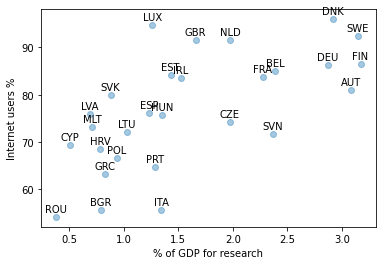

In [78]:
# simple scatter plot on variable x and y:
plt.scatter(eu_df.research_gdp, eu_df.internet_users, alpha=0.4)

# iterate over the two variables (coordinates) and country names
for x,y,country in zip(eu_df.research_gdp, eu_df.internet_users, eu_df.iso3c):
    plt.annotate(country, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,5), # distance from text to points (x,y)
                 ha='center')

# set x and y axis labels
plt.xlabel("% of GDP for research")
plt.ylabel("Internet users %")

End of notebook.